In [1]:
import pickle as pk
from tqdm import tqdm
START_YAER = 1800
END_YAER = 2021
CUT_YEAR_COUNT = 3
NO_CUT_YEAR = 100
print('参数设置: START_YAER: %d, END_YAER: %d, CUT_YEAR_COUNT: %d'%(START_YAER, END_YAER, CUT_YEAR_COUNT))

参数设置: START_YAER: 1800, END_YAER: 2021, CUT_YEAR_COUNT: 3


In [13]:
# 职业生涯至少2年的研究者
cutyearCount = 2
InitialSpan = 1

#初始学科
KeyInitialSetCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyInitialSetCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyInitialSetCounterM=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyInitialSetCounterM%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
#不动学科
KeyNoBreakthroughCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyNoBreakthroughCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyNoBreakthroughCounterM=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyNoBreakthroughCounterM%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
#动的学科，谁向谁变动的最多？
KeyBreakthroughCombineCounterM21=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCombineCounterM21%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyBreakthroughCombineCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCombineCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))

条形图：各学科的作者数量（数initialSet中各学科的数，至少有两年以主要负责人发过文章的数量）

In [117]:
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as mtick
import pickle as pk
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 12 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

<Figure size 1200x900 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


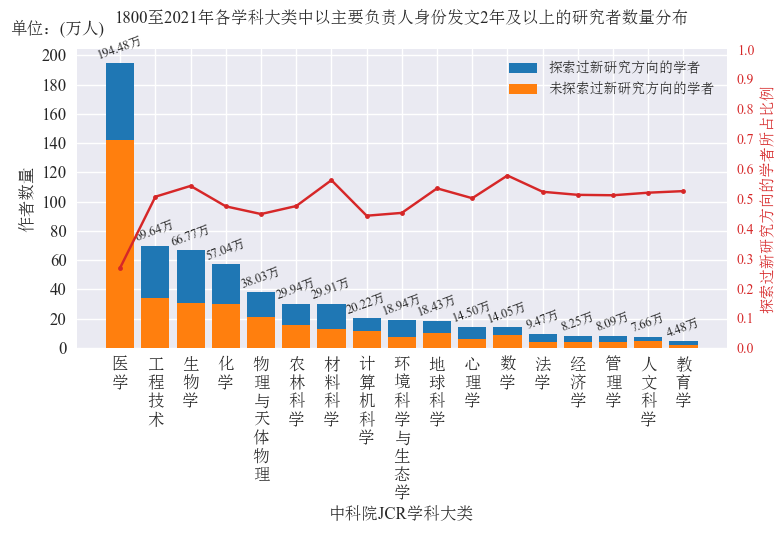

In [125]:
# 各学科作者数量分布（至少2年主要负责人经历）
Fields , frequency = zip(*sorted(KeyInitialSetCounter.items(),key=lambda x:-x[1]))
frequency = np.array(frequency)
NobreakFields , Nobreakfrequency = zip(*sorted(KeyNoBreakthroughCounter.items(),key=lambda x:-x[1]))
Nobreakfrequency = np.array(Nobreakfrequency)
# print(numFields, frequency)
ept_list = []
for i in Fields:
    ept_list.append('\n'.join(list(i)))
fig, ax = plt.subplots()
plt.text(-0.03,1.07,'单位：(万人)',
horizontalalignment='center',verticalalignment='center',
transform=ax.transAxes)
bars = ax.bar(Fields, frequency/10000.0, label='探索过新研究方向的学者',color='tab:blue')
ax.bar_label(bars,fmt = '%.2f万',font=prop.get_name(),fontsize=9, padding=1,rotation=20)
ax.bar(NobreakFields, Nobreakfrequency/10000.0,color='tab:orange',label='未探索过新研究方向的学者')
ax.set_ylabel('作者数量', font=prop.get_name())
ax.set_xlabel('中科院JCR学科大类', font=prop.get_name())
ax.set_title('1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者数量分布\n', font=prop.get_name())
ax.set_xticks(Fields,ept_list)
ax.set_yticks(np.array(range(0,201,20)))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.rcParams['axes.axisbelow'] = True
ax.grid(True)
# 双轴
ax2 = ax.twinx()
ax2.plot(Fields, 1-Nobreakfrequency/frequency, color='tab:red',marker='.')
ax2.grid(False)
ax2.set_ylim(0,1)
ax2.set_yticks(np.array(range(0,11))/10)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylabel('探索过新研究方向的学者所占比例', color='tab:red')
ax.legend()
ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig("1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者数量分布.png",dpi=300,bbox_inches='tight')

In [15]:
KeyInitialSetCounter

Counter({'化学': 570422,
         '医学': 1944847,
         '法学': 94740,
         '环境科学与生态学': 189361,
         '材料科学': 299118,
         '工程技术': 696369,
         '计算机科学': 202153,
         '农林科学': 299426,
         '生物学': 667652,
         '物理与天体物理': 380340,
         '地球科学': 184327,
         '数学': 140459,
         '经济学': 82545,
         '教育学': 44838,
         '心理学': 144963,
         '人文科学': 76635,
         '管理学': 80945})

可选：各学科作者寿命、各学科关键发文时点数、各学科跳转的平均时点数